<b>Ajwaa or Medjool</b>

---


Klasifikasi pada Kurma Ajwa/Medjool menggunakan K-Nearest Neighbour

<b>Kelompok: </b>

Anggota:
1. Bagas Eko Tjahyono Putro - 1301223279
2. Faiz Maula Ahmad Edwin Putra - 1301223017
3. Muhammad Adnansyah - 1301223460

#### Pendahuluan

Kami akan menggunakan dataset yang terdiri dari dua jenis kurma: Ajwa dan Medjool. Dataset ini mencakup berbagai fitur seperti panjang buah, diameter buah, berat buah, panjang biji, kalori, dan warna, yang dapat membantu membedakan antara kedua jenis kurma tersebut.

Masalah yang ingin diselesaikan adalah klasifikasi jenis kurma berdasarkan fitur-fitur yang telah disebutkan. Kami akan menggunakan metode K-Nearest Neighbors (KNN) untuk mengklasifikasikan apakah sebuah kurma adalah jenis Ajwa atau Medjool berdasarkan fitur-fiturnya.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Exploration Data Analysis**

Disini kami mengeksplorasi dan menganalisis data untuk menentukan langkah apa yang akan diambil selanjutnya

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Menampilkan data yang akan diolah
data = pd.read_csv('/content/drive/MyDrive/TugasPengantarAI/dataKurma_indo.csv')
print(data.head())

   panjang_buah  diameter_buah  berat_buah  panjang_biji  kalori  warna jenis
0           3.2            2.0          12           2.2   41.28  Black  Ajwa
1           3.5            1.8          11           1.9   37.84  Black  Ajwa
2           3.0            1.7           9           2.0   30.96  Black  Ajwa
3           3.1            2.0          10           1.9   34.40  Black  Ajwa
4           2.8            1.8           9           1.9   30.96  Black  Ajwa


In [ ]:
# Menampilkan informasi data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   panjang_buah   20 non-null     float64
 1   diameter_buah  20 non-null     float64
 2   berat_buah     20 non-null     int64  
 3   panjang_biji   20 non-null     float64
 4   kalori         20 non-null     float64
 5   warna          20 non-null     object 
 6   jenis          20 non-null     object 
dtypes: float64(4), int64(1), object(2)
memory usage: 1.2+ KB


In [ ]:
# Menampilkan deskripsi data
data.describe()

,panjang_buah,diameter_buah,berat_buah,panjang_biji,kalori
count,20.000000,20.00000,20.000000,20.000000,20.00000
mean,4.005000,1.87500,13.150000,2.280000,43.05200
std,0.853769,0.28631,2.978431,0.347321,8.27551
min,2.800000,1.40000,9.000000,1.900000,30.96000
25%,3.175000,1.70000,10.750000,1.975000,36.98000
50%,4.000000,1.80000,13.000000,2.200000,42.76000
75%,5.000000,2.00000,15.250000,2.625000,48.19000
max,5.200000,2.50000,19.000000,2.900000,60.04000


In [ ]:
# Mengecek data yang hilang
print(data.isnull().sum())

panjang_buah     0
diameter_buah    0
berat_buah       0
panjang_biji     0
kalori           0
warna            0
jenis            0
dtype: int64


**Data Preprocessing**

Setelah melakukan eksplorisasi dan menganalisis data, selanjutnya kami melakukan pemrosesan data untuk mendapatkan data yang sesuai pada langkah perancangan model

In [ ]:
# Mapping target variables
target_jenis = {'Ajwa': 0, 'Medjool': 1}
target_warna = {'Black': 0, 'Brown': 1}

data['jenis'] = data['jenis'].map(target_jenis)
data['warna'] = data['warna'].map(target_warna)

In [ ]:
# Sampling data
data = data.sample(20).reset_index(drop=True)

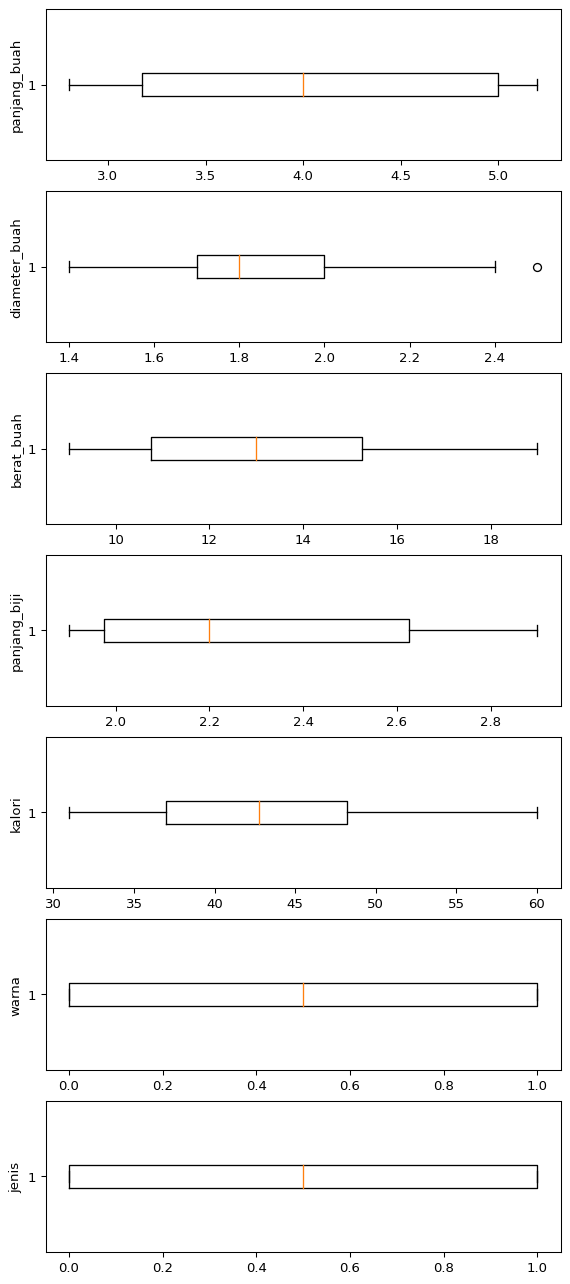

In [ ]:
# Box Plots untuk melihat outliers
fig, axs = plt.subplots(7, 1, dpi=95, figsize=(7, 17))
i = 0
for col in data.columns:
    axs[i].boxplot(data[col], vert=False)
    axs[i].set_ylabel(col)
    i += 1
plt.show()

In [ ]:
# Deteksi Outliers
Q1 = data['diameter_buah'].quantile(0.25)
Q3 = data['diameter_buah'].quantile(0.75)
IQR = Q3 - Q1

Batas_Bawah = Q1 - 1.5 * IQR
Batas_Atas = Q3 + 1.5 * IQR

print("Batas Bawah untuk outlier: ", Batas_Bawah)
print("Batas Atas untuk outlier: ", Batas_Atas)

Batas Bawah untuk outlier:  1.25
Batas Atas untuk outlier:  2.45


In [ ]:
data['outlier'] = (data['diameter_buah'] < Batas_Bawah) | (data['diameter_buah'] > Batas_Atas)
data

,panjang_buah,diameter_buah,berat_buah,panjang_biji,kalori,warna,jenis,outlier
0,5.0,1.7,15,2.1,47.40,1,1,False
1,4.4,2.0,14,2.9,44.24,1,1,False
2,5.0,2.4,19,2.8,60.04,1,1,False
3,5.2,1.4,17,2.6,53.72,1,1,False
4,3.0,1.7,9,2.0,30.96,0,0,False
5,3.6,2.5,9,2.7,30.96,0,0,True
6,3.1,2.0,10,1.9,34.40,0,0,False
7,5.0,2.0,17,2.0,53.72,1,1,False
8,3.1,1.9,12,2.2,41.28,0,0,False
9,5.0,1.4,15,2.5,47.40,1,1,False


In [ ]:
dataBersih = data[~data['outlier']]
dataBersih

,panjang_buah,diameter_buah,berat_buah,panjang_biji,kalori,warna,jenis,outlier
0,5.0,1.7,15,2.1,47.40,1,1,False
1,4.4,2.0,14,2.9,44.24,1,1,False
2,5.0,2.4,19,2.8,60.04,1,1,False
3,5.2,1.4,17,2.6,53.72,1,1,False
4,3.0,1.7,9,2.0,30.96,0,0,False
6,3.1,2.0,10,1.9,34.40,0,0,False
7,5.0,2.0,17,2.0,53.72,1,1,False
8,3.1,1.9,12,2.2,41.28,0,0,False
9,5.0,1.4,15,2.5,47.40,1,1,False
10,4.6,1.7,13,2.7,41.08,1,1,False


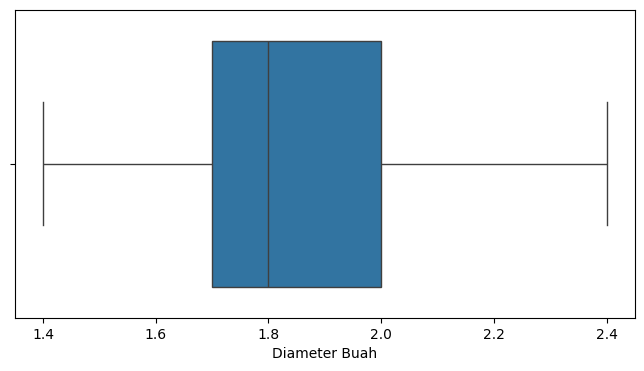

In [ ]:
# Plot tanpa outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x=dataBersih['diameter_buah'])
plt.xlabel('Diameter Buah')
plt.show()

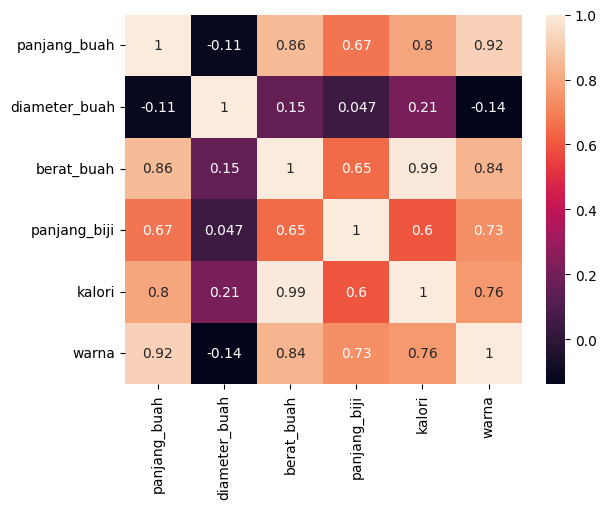

In [ ]:
# Visualisasi korelasi
data3 = dataBersih.drop(['jenis', 'outlier'], axis=1)
sns.heatmap(data3.corr(), annot=True)
plt.show()

In [ ]:
dataNumerik = dataBersih.drop(['jenis', 'outlier'], axis=1)
data_target = dataBersih['jenis']

# Normalisasi data
normalisasi = (dataNumerik - dataNumerik.min()) / (dataNumerik.max() - dataNumerik.min())
normalisasi.describe()

,panjang_buah,diameter_buah,berat_buah,panjang_biji,kalori,warna
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,0.510965,0.442105,0.436842,0.357895,0.437704,0.526316
std,0.363200,0.252357,0.289080,0.342078,0.274540,0.512989
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.145833,0.300000,0.250000,0.050000,0.292297,0.000000
50%,0.583333,0.400000,0.400000,0.300000,0.456671,1.000000
75%,0.916667,0.600000,0.650000,0.650000,0.619670,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
normalized_data = pd.concat([normalisasi, data_target], axis=1)
normalized_data.head()

,panjang_buah,diameter_buah,berat_buah,panjang_biji,kalori,warna,jenis
0,0.916667,0.3,0.6,0.2,0.565337,1.0,1
1,0.666667,0.6,0.5,1.0,0.456671,1.0,1
2,0.916667,1.0,1.0,0.9,1.000000,1.0,1
3,1.000000,0.0,0.8,0.7,0.782669,1.0,1
4,0.083333,0.3,0.0,0.1,0.000000,0.0,0


**Data Splitting**

Disini kami membagi dataset menjadi beberapa fold yang akan digunakan untuk cross-validation. Dalam cross-validation, data dibagi menjadi beberapa subset (fold) dan proses pelatihan serta pengujian model dilakukan beberapa kali dengan menggunakan kombinasi yang berbeda dari subset tersebut.

In [ ]:
# Membagi data menjadi beberapa fold untuk cross-validation
fold1 = (normalized_data.iloc[0:5].reset_index(drop=True), normalized_data.iloc[5:20].reset_index(drop=True))
fold2 = (normalized_data.iloc[5:10].reset_index(drop=True), pd.concat([normalized_data.iloc[0:5].reset_index(drop=True), normalized_data.iloc[10:20].reset_index(drop=True)]))
fold3 = (normalized_data.iloc[10:20].reset_index(drop=True), normalized_data.iloc[0:10].reset_index(drop=True))

#### Metode yang Digunakan
K-Nearest Neighbors (KNN) adalah algoritma supervised learning yang digunakan untuk tugas klasifikasi dan regresi. Dalam klasifikasi, tujuan KNN adalah untuk mengklasifikasikan objek berdasarkan kategori mayoritas dari tetangga terdekatnya. Algoritma ini sederhana namun sangat efektif dalam banyak kasus.

Parameter Setting pada KNN

k (Jumlah Tetangga Terdekat):
*   Parameter ini menentukan berapa banyak tetangga terdekat yang digunakan untuk menentukan kelas.
*  Pemilihan nilai 'k' biasanya berdasarkan eksperimen atau cross-validation.

Metric (Metode Pengukuran Jarak): Euclidean Distance


**Experiment Settings**

In [ ]:
# Definisi fungsi jarak dan prediksi
def euclidean(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

In [ ]:
def predict(x, k, data1, data2):
    jarak = []
    for _, row in data1.iterrows():
        jarak.append(euclidean(x, row))

    dataNew = data1.copy()
    dataNew['jarak'] = jarak
    dataNew['jenis'] = data2
    dataNew = dataNew.sort_values(by='jarak').reset_index(drop=True)
    y_pred = dataNew.iloc[:k].jenis.mode()
    return y_pred[0]

In [ ]:
def accuracy(y_pred, y_true):
    n = len(y_pred)
    benar = sum(y_pred[i] == y_true[i] for i in range(n))
    return (benar / n) * 100

**Model Training**

In [ ]:
# Training dan evaluasi model
for k in [1, 3, 11]:
    acc_test = []
    acc_train = []

    for fold in [fold1, fold2, fold3]:
        test, train = fold

        x_train, y_train = train.drop(['jenis'], axis=1), train['jenis']
        x_test, y_test = test.drop(['jenis'], axis=1), test['jenis']

        preds_test = [predict(x_test.iloc[i], k, x_train, y_train) for i in range(len(x_test))]
        acc_test.append(accuracy(preds_test, list(y_test)))

        preds_train = [predict(x_train.iloc[i], k, x_train, y_train) for i in range(len(x_train))]
        acc_train.append(accuracy(preds_train, list(y_train)))

    print(f"Dengan k = {k}, rata-rata akurasi pada data uji adalah {sum(acc_test) / len(acc_test)}")
    print(f"Dengan k = {k}, rata-rata akurasi pada data latih adalah {sum(acc_train) / len(acc_train)}")

Dengan k = 1, rata-rata akurasi pada data uji adalah 100.0
Dengan k = 1, rata-rata akurasi pada data latih adalah 100.0
Dengan k = 3, rata-rata akurasi pada data uji adalah 100.0
Dengan k = 3, rata-rata akurasi pada data latih adalah 100.0
Dengan k = 11, rata-rata akurasi pada data uji adalah 77.77777777777777
Dengan k = 11, rata-rata akurasi pada data latih adalah 90.0


**Model Testing and Evaluation**

In [ ]:
# Fungsi untuk menerima input dari pengguna dan melakukan prediksi
def predict_kurma():
    features_data = dataBersih.drop(['warna', 'jenis', 'outlier'], axis=1)
    target_data = dataBersih['jenis']

    panjangBuah = float(input("Masukkan panjang buah (cm): "))
    diameter = float(input("Masukkan diameter (cm): "))
    berat = float(input("Masukkan berat buah (g): "))
    panjangBiji = float(input("Masukkan panjang biji (cm): "))
    kalori = float(input("Masukkan kalori buah (KKal): "))

    input_data = np.array([panjangBuah, diameter, berat, panjangBiji, kalori])
    normalisasi_input = (input_data - features_data.min()) / (features_data.max() - features_data.min())

    k = int(input("Masukkan nilai k: "))

    prediction = predict(normalisasi_input, k, features_data, target_data)

    jenis_mapping = {0: 'Ajwa', 1: 'Medjool'}
    print(f'Jenis kurma yang diprediksi: {jenis_mapping[prediction]}')

# Memanggil fungsi prediksi
predict_kurma()

Masukkan panjang buah (cm): 3.5
Masukkan diameter (cm): 1.8
Masukkan berat buah (g): 11
Masukkan panjang biji (cm): 1.9
Masukkan kalori buah (KKal): 34.40
Masukkan nilai k: 3
Jenis kurma yang diprediksi: Ajwa


**Show the Performance**

In [ ]:
train_accuracies = []
test_accuracies = []

folds = [fold1, fold2, fold3]
k_values = [1, 3, 5, 7, 9, 11, 13, 15]

results = []

for k in k_values:
    fold_train_accuracies = []
    fold_test_accuracies = []

    for (X_test, X_train) in folds:
        y_train = X_train['jenis']
        y_test = X_test['jenis']
        X_train = X_train.drop(columns=['jenis'])
        X_test = X_test.drop(columns=['jenis'])

        # Train accuracy
        train_preds = [predict(X_train.iloc[i], k, X_train, y_train) for i in range(len(X_train))]
        train_acc_k = accuracy(train_preds, list(y_train))
        fold_train_accuracies.append(train_acc_k)

        # Test accuracy
        test_preds = [predict(X_test.iloc[i], k, X_train, y_train) for i in range(len(X_test))]
        test_acc_k = accuracy(test_preds, list(y_test))
        fold_test_accuracies.append(test_acc_k)

    mean_train_acc_k = np.mean(fold_train_accuracies)
    mean_test_acc_k = np.mean(fold_test_accuracies)

    train_accuracies.append(mean_train_acc_k)
    test_accuracies.append(mean_test_acc_k)
    results.append([k, mean_train_acc_k, mean_test_acc_k])

results_df = pd.DataFrame(results, columns=['k', 'Mean Train Accuracy', 'Mean Test Accuracy'])
results_df

,k,Mean Train Accuracy,Mean Test Accuracy
0,1,100.000000,100.000000
1,3,100.000000,100.000000
2,5,100.000000,100.000000
3,7,90.000000,77.777778
4,9,90.000000,77.777778
5,11,90.000000,77.777778
6,13,75.714286,51.111111
7,15,59.047619,31.111111


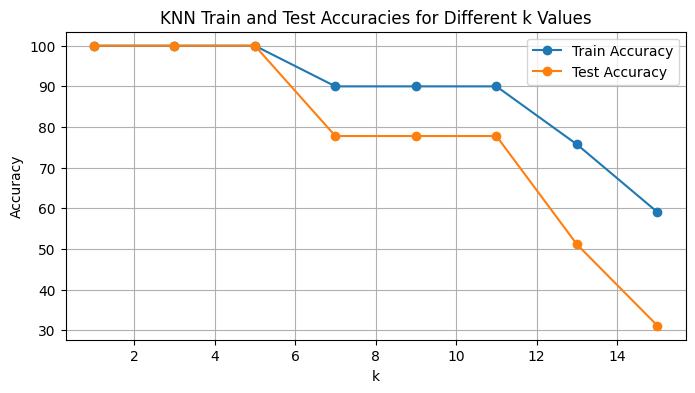

In [ ]:
# Plotting the accuracies
plt.figure(figsize=(8, 4))
plt.plot(k_values, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(k_values, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('KNN Train and Test Accuracies for Different k Values')
plt.legend()
plt.grid(True)
plt.show()

#### Hasil dan Analisis

- Nilai k yang Optimal: Berdasarkan grafik, nilai k yang optimal tampaknya berada di sekitar k = 3 hingga k = 5, di mana akurasi pengujian masih relatif tinggi sebelum mulai menurun tajam.

- Overfitting: Pada nilai k yang sangat kecil (k = 1), model menunjukkan akurasi pelatihan yang sangat tinggi tetapi akurasi pengujian mulai menurun, menunjukkan tanda-tanda overfitting.

- Underfitting: Pada nilai k yang sangat besar (k > 10), baik akurasi pelatihan maupun pengujian menurun tajam, menunjukkan bahwa model menjadi terlalu sederhana dan tidak dapat menangkap pola dalam data (underfitting).

#### Kesimpulan

- Disarankan untuk memilih nilai k di sekitar 3 hingga 5 untuk model KNN ini.

- Evaluasi lebih lanjut dengan menggunakan lebih banyak data, karena data pada model yang kami buat cenderung sangat sedikit sehingga hasil yang didapat tidak konsisten.
